## Ejercicio para tus Alumnos: Regresión y Clasificación con el Dataset de Bike Sharing

### Instrucciones Generales
- Descarga el dataset de Bike Sharing de la UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
- Explora y prepara los datos
- Desarrolla un modelo de regresión para predecir el número de alquileres
- Desarrolla un modelo de clasificación para predecir categorías de demanda
- Evalúa y compara ambos modelos

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
day = pd.read_csv('data/day.csv',index_col='instant')
hour = pd.read_csv('data/hour.csv',index_col='instant')

In [11]:
df = day.copy()

In [12]:
df.shape

(731, 15)

In [13]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [15]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
pd.to_datetime(df['dteday'])

instant
1     2011-01-01
2     2011-01-02
3     2011-01-03
4     2011-01-04
5     2011-01-05
         ...    
727   2012-12-27
728   2012-12-28
729   2012-12-29
730   2012-12-30
731   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [19]:
print(df['dteday'].min())
print(df['dteday'].max())

2011-01-01
2012-12-31


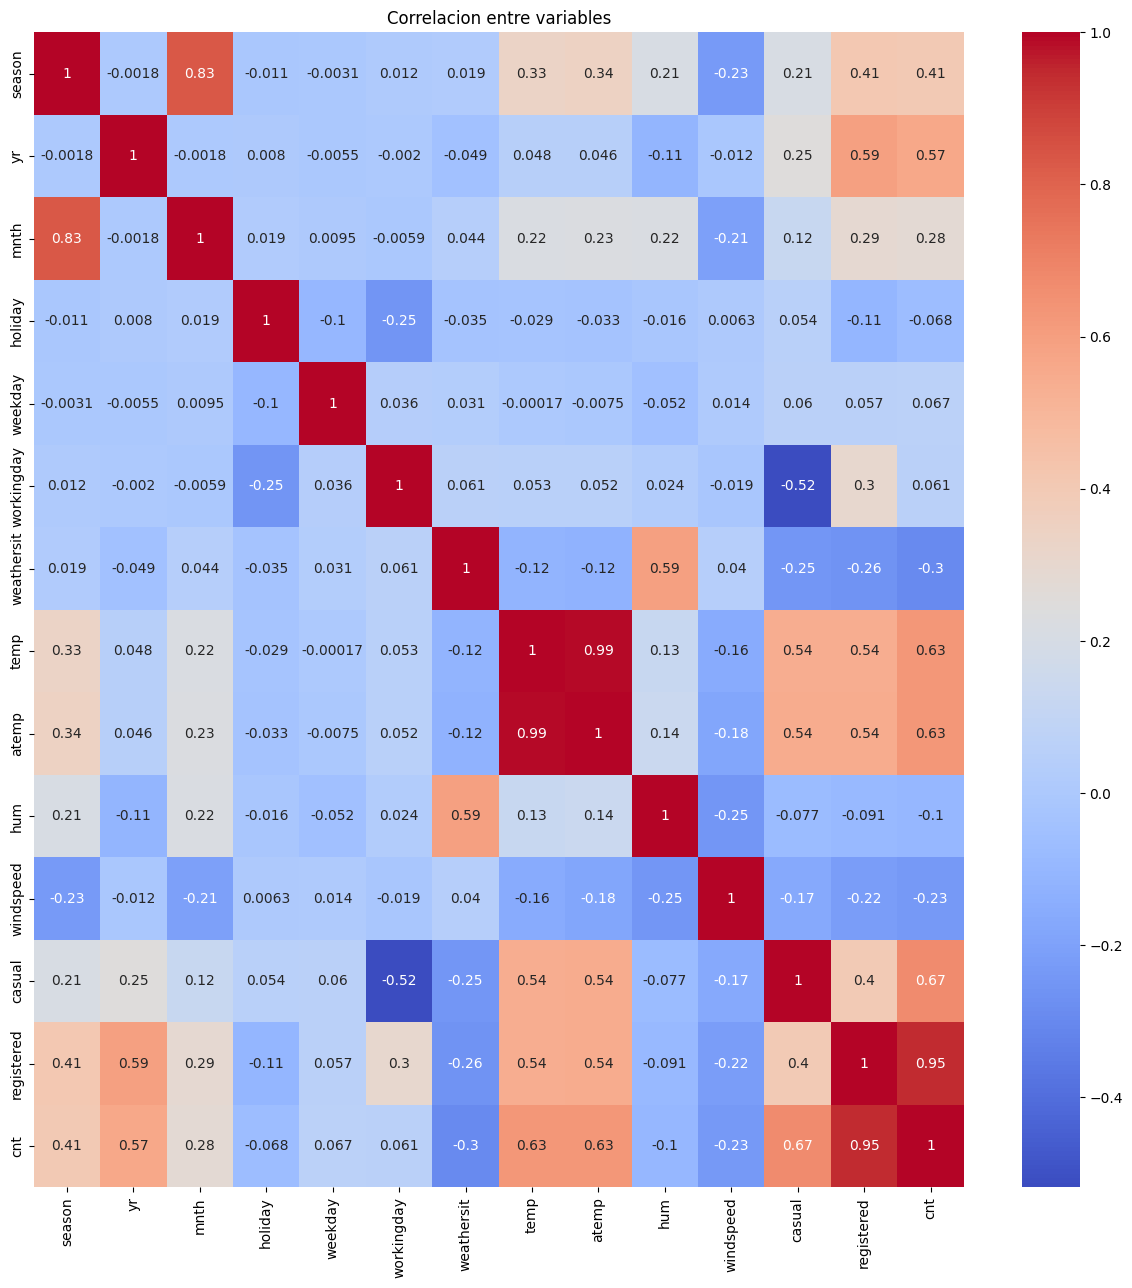

In [24]:
plt.figure(figsize=(15,15))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.title('Correlacion entre variables');

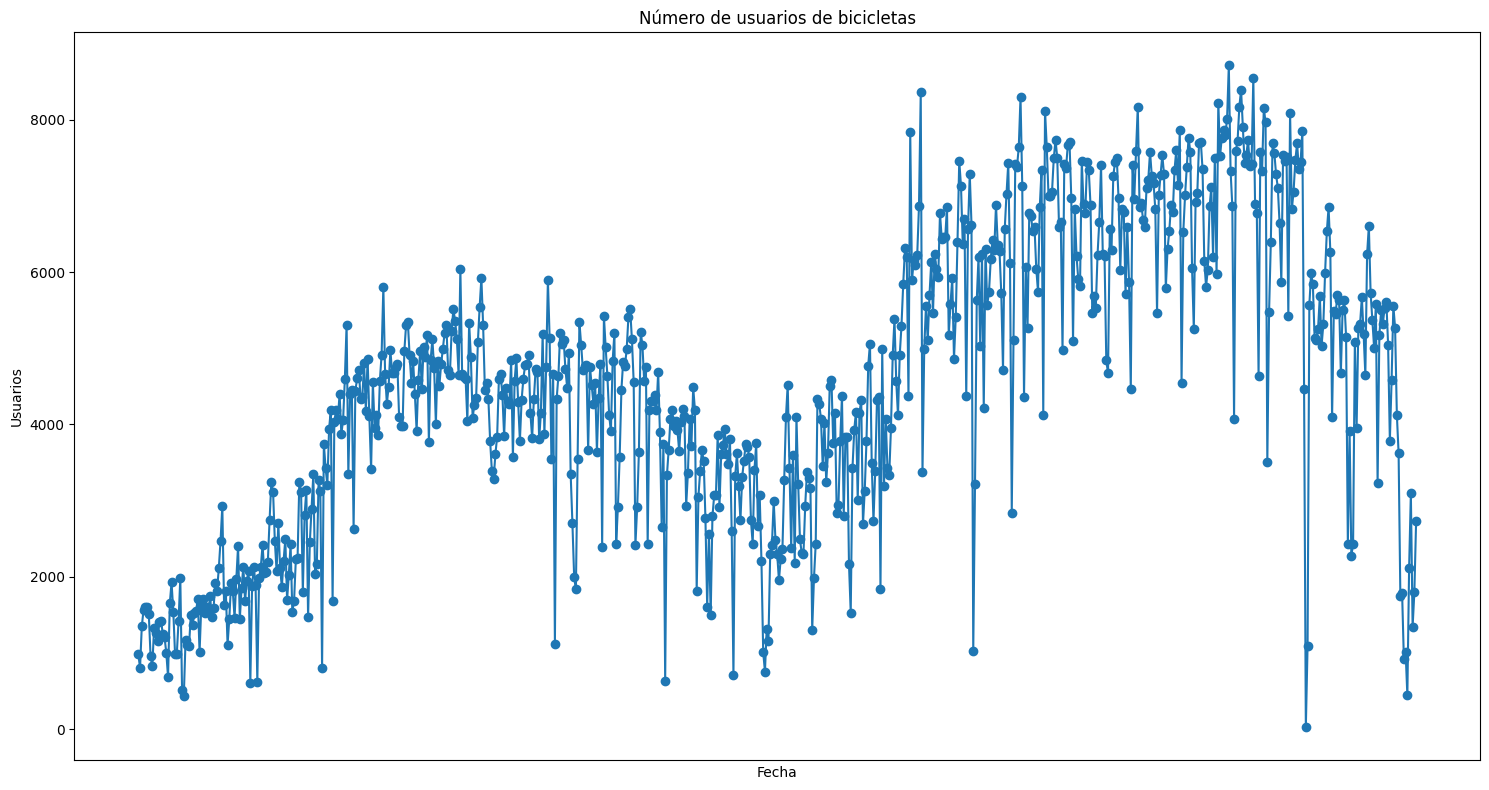

In [39]:
plt.figure(figsize=(15,8))
plt.plot(df['dteday'], df['cnt'], label='Train',marker='o')

# Configurar títulos y etiquetas
plt.title('Número de usuarios de bicicletas')
plt.xlabel('Fecha')
plt.xticks([])
plt.ylabel('Usuarios')

# Eliminar márgenes innecesarios
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [48]:
X = df.drop(columns=['cnt','dteday'])
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
rf = RandomForestRegressor(n_estimators=200)

In [50]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [54]:
pred = rf.predict(X_test)
root_mean_squared_error(y_test,pred)

100.33039547645859

### Ejercicio de Regresión

#### Carga y exploración inicial de datos
1. Cargar el dataset
2. Explorar la estructura de los datos (shape, info, describe)
3. Visualizar la distribución de alquileres de bicicletas
4. Analizar correlaciones entre variables
#### Preprocesamiento de datos
5. Manejar valores nulos si existen
6. Codificar variables categóricas (día de la semana, temporada, etc.)
7. Normalizar variables numéricas
8. Dividir en conjuntos de entrenamiento y prueba
#### Construcción del modelo de regresión
9. Diseñar la arquitectura de la red neuronal
10. Configurar hiperparámetros iniciales
11. Compilar el modelo usando la función de pérdida adecuada para regresión (MSE)
12. Implementar callbacks (EarlyStopping, ReduceLROnPlateau)
#### Entrenamiento y evaluación
13. Entrenar el modelo
14. Visualizar las curvas de aprendizaje
15. Evaluar en el conjunto de prueba (MSE, MAE, R²)
16. Visualizar predicciones vs valores reales
#### Optimización
17. Ajustar hiperparámetros (tasa de aprendizaje, arquitectura, etc.)
18. Probar diferentes combinaciones de características
19. Implementar regularización si es necesario
20. Pasos Detallados para el Ejercicio de Clasificación


### Problema de Clasificación
1. Crear categorías basadas en el número de alquileres (por ejemplo, 'baja', 'media', 'alta')
2. Visualizar la distribución de las clases
#### Preparación de datos para clasificación
3. Codificar la variable objetivo (one-hot encoding)
4. Asegurar balance de clases o implementar técnicas para manejar desbalance
#### Construcción del modelo de clasificación
5. Diseñar la arquitectura de la red neuronal (similar a la de regresión pero con ajustes)
6. Usar activación softmax en la capa de salida
7. Compilar con función de pérdida categorical_crossentropy
8. Añadir métricas de clasificación (accuracy, precision, recall)
#### Entrenamiento y evaluación
9. Entrenar el modelo de clasificación
10. Visualizar la matriz de confusión
11. Calcular métricas por clase (precision, recall, F1-score)
12. Generar curva ROC para problemas multiclase
#### Optimización y comparación
13. Ajustar hiperparámetros
14. Comparar con otros algoritmos de clasificación
15. Evaluar importancia de características
